In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
f1_score, roc_auc_score, roc_curve, auc, accuracy_score, classification_report)

In [2]:
# Load the CSV data into a DataFrame
df = pd.read_excel('final database (3).xlsx')

In [3]:
# Check shape of the data
print("Studen survey -  rows:",df.shape[0]," columns:", df.shape[1])

Studen survey -  rows: 463  columns: 46


**Dataset Key Features**

- Number of cases: 463
- Columns/Features/Variables: 46
- Data Types: Primarily intger and string types.

## Data Assessment and Cleaning


In [4]:
# Check for missing values
print(df.isnull().sum().sum())
#no null

0


In [5]:
# Check duplicates ##
df.duplicated().sum()
### Drop duplicated records
df.drop_duplicates(inplace=True)

In [6]:
df = df.drop(labels='Residency (محافظة الإقامة الحالية)', axis=1)


In [7]:
# Check drop duplicates of the data
print("Studen survey -  rows:",df.shape[0]," columns:", df.shape[1])

Studen survey -  rows: 453  columns: 45


In [8]:
df['last_year_grade'] = df['last_year_grade'].replace({'(امتياز) A  85%–100%':'A','(امتياز) A  90%–100%':'A','(جيد جدا ) B  84%–75%':'B','(جيد جدا ) B  80%–89%':'B','(جيد) C  74%–65%':'C','(جيد) C  70%–79%':'C','( مقبول ) D  60%-64%':'D','( مقبول ) D  60%–69%':'D','( راسب) F < %60':'F'})

In [9]:
print(df['last_year_grade'].value_counts())

A    263
B    116
C     59
D     11
F      4
Name: last_year_grade, dtype: int64


In [10]:
#Data integration
#remove f recourds
df = df[df['last_year_grade'] != 'F']

In [11]:
#repaire outliers
def detect_outliers_zscore(column):
    outliers = []
    Mean = np.mean(column)
    SD = np.std(column)
    Upper_Limit = 3
    Lower_Limit = -3
    for i in column:
        z_score = (i-Mean)/SD
        if (z_score < Lower_Limit or z_score > Upper_Limit):
            outliers.append(i)
    return outliers

In [12]:
#Age outliers
detect_outliers_zscore(df['Age'])

[41, 2, 27]

Text(0.5, 1.0, 'Boxplot for Age')

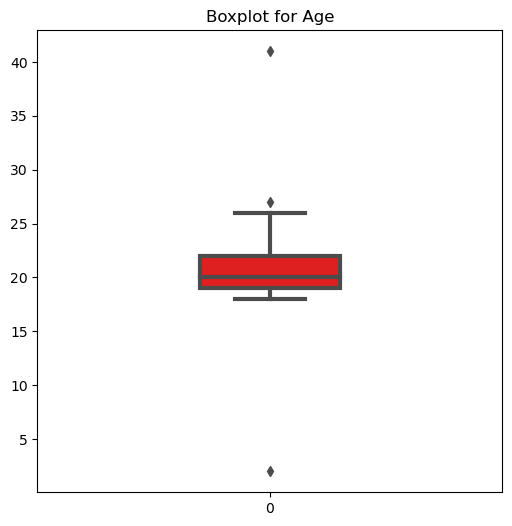

In [13]:
#Box Plot for Age outliers
plt.figure(figsize=(6, 6))
sns.boxplot(df['Age'], color='red', linewidth=3, width=0.3)
plt.title('Boxplot for Age')

In [14]:
#Reparing the outliers
df.loc[(df['Age'] > np.percentile(df['Age'], 95)), 'Age'] = np.percentile(df['Age'], 95)
df.loc[(df['Age'] < np.percentile(df['Age'], 5)), 'Age'] = np.percentile(df['Age'], 5)
print("Outliers in Age has been treated.")

Outliers in Age has been treated.


In [15]:
detect_outliers_zscore(df['Age'])

[]

Text(0.5, 1.0, 'Boxplot for Age')

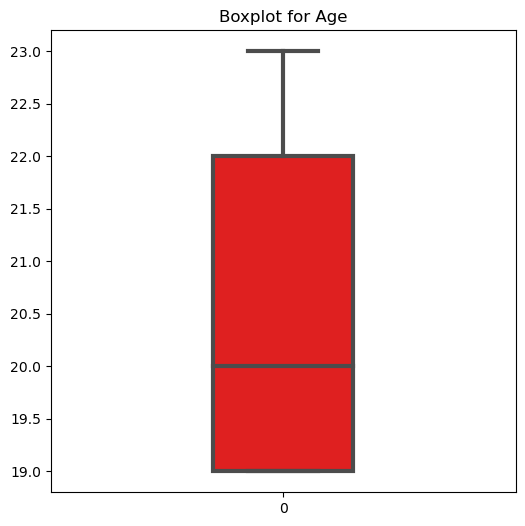

In [16]:
#box plot after treating the outliers
plt.figure(figsize=(6, 6))
sns.boxplot(df['Age'], color='red', linewidth=3, width=0.3)
plt.title('Boxplot for Age')

In [17]:
#get categorical and transfotm it to dummies
label_encoder = LabelEncoder()
for col in ['Gender ', 'Grade ','University ' ,'Do you study in the same city you stay in? ']:
    df[col] = label_encoder.fit_transform(df[col])

# aggregation


In [19]:
themes ={ "Ability to commit and focus" : ['X3','X7','X24','X4'],
        "attendance and writing notes":['X10','X9','X22','X23','X17','X18','X8'],
         "Good preparation for exams" :['X5','X25','X26','X27','X28','X30'],
          "Time management":['X11','X12'],
         "Commitment to study and control online time":['X6','X13','X14','X19','X21'],
         "ِAcademic stress":['X29','X30','X31','X32'],
         "ِHealth and activity":['X1','X2'],
         "Satisfaction with grades and social connection":['X15','X16','X20'],
         "Financial concerns":['X37'],
         "Difficulty of the medical curriculum":['X39','X38','X36','X35','X34','X33']
          }


used_questions =[]
for theme,questions in themes.items():
    df[theme] = df[questions].mean(axis=1)
    used_questions.extend(questions)
    
    
df = df.drop(columns = used_questions)    



In [30]:
df.columns

Index(['Gender ', 'Grade ', 'Age',
       'Do you study in the same city you stay in? ', 'University ',
       'last_year_grade', 'Ability to commit and focus',
       'attendance and writing notes', 'Good preparation for exams',
       'Time management', 'Commitment to study and control online time',
       'ِAcademic stress', 'ِHealth and activity',
       'Satisfaction with grades and social connection', 'Financial concerns',
       'Difficulty of the medical curriculum'],
      dtype='object')

**Bulding Models:**

*  K = 4








1.   KNN



In [61]:
X = df.drop(['last_year_grade'], axis=1)  # features
y = df['last_year_grade']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [62]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))


KNN Confusion Matrix:
[[49  4  2  0]
 [21  2  4  0]
 [ 3  3  0  0]
 [ 2  0  0  0]]
KNN Classification Report:
              precision    recall  f1-score   support

           A       0.65      0.89      0.75        55
           B       0.22      0.07      0.11        27
           C       0.00      0.00      0.00         6
           D       0.00      0.00      0.00         2

    accuracy                           0.57        90
   macro avg       0.22      0.24      0.22        90
weighted avg       0.47      0.57      0.49        90

KNN Recall: 0.24124579124579124
KNN F1 Score: 0.21623931623931625


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   
2.   NB



In [63]:
# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='macro'))

Naive Bayes Confusion Matrix:
[[50  2  3  0]
 [17  0  7  3]
 [ 1  1  2  2]
 [ 1  0  0  1]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.91      0.81        55
           B       0.00      0.00      0.00        27
           C       0.17      0.33      0.22         6
           D       0.17      0.50      0.25         2

    accuracy                           0.59        90
   macro avg       0.26      0.44      0.32        90
weighted avg       0.46      0.59      0.51        90

Naive Bayes Recall: 0.4356060606060606
Naive Bayes F1 Score: 0.319668458781362



3.   Decision Tree



In [64]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=3, random_state=100 ,)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))

Decision Tree Confusion Matrix:
[[44 10  1  0]
 [19  4  4  0]
 [ 1  3  2  0]
 [ 1  1  0  0]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           A       0.68      0.80      0.73        55
           B       0.22      0.15      0.18        27
           C       0.29      0.33      0.31         6
           D       0.00      0.00      0.00         2

    accuracy                           0.56        90
   macro avg       0.30      0.32      0.30        90
weighted avg       0.50      0.56      0.52        90

Decision Tree Recall: 0.32037037037037036
Decision Tree F1 Score: 0.30470085470085473


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


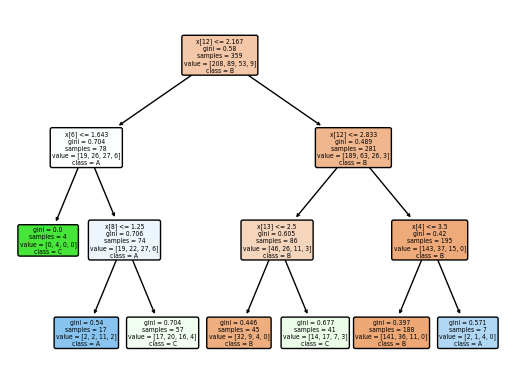

In [65]:
from sklearn.tree import plot_tree

# Create a decision tree visualization
plot_tree(dt, filled=True, rounded=True, class_names=y_train.unique())

# Display the tree
plt.show()

In [67]:
log_mod = LogisticRegression(random_state=1234)
# Fit the logistic regression
log_model_1 = log_mod.fit(X_train, y_train)
# display intercept
print(log_model_1.intercept_)
# display coefficients
print(log_model_1.coef_)

[ 0.02630326  0.05058668 -0.09494333  0.01805339]
[[-0.47297823  0.04329558 -0.13658761  0.36252738 -0.01006048  0.06269735
  -0.35851168  0.37966658  0.15480595  0.46108041 -0.09324062 -0.05475236
   0.81837911 -0.16217212  0.21299277]
 [ 0.14178758  0.00981417 -0.09779952  0.23665833  0.10635161  0.2216821
  -0.33043713  0.15206362  0.09958943  0.25925357  0.14265524  0.15531371
   0.12767358 -0.09038043  0.08680602]
 [ 0.53904548  0.07424242  0.00789355 -0.25596314  0.20786757 -0.23756285
   0.4347621  -0.33277266  0.06418648  0.04426097  0.22383643 -0.11225039
  -0.29734233 -0.26387072  0.20293744]
 [-0.20785483 -0.12735217  0.22649358 -0.34322258 -0.3041587  -0.0468166
   0.25418671 -0.19895755 -0.31858186 -0.76459494 -0.27325105  0.01168903
  -0.64871036  0.51642328 -0.50273623]]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Make predictions on test set
y_pred_logit = log_model_1.predict(X_test)
y_pred_logit

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C',
       'A', 'A', 'B', 'A', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'C', 'A', 'B', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'D', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'B', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'D', 'A'],
      dtype=object)

In [69]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_logit)
print("Confusion matrix:\n", cm)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logit)
print("Logit accuracy score:", accuracy)


Confusion matrix:
 [[51  2  2  0]
 [21  2  3  1]
 [ 2  3  0  1]
 [ 0  1  0  1]]
Logit accuracy score: 0.6


In [70]:
# Calculate classification report
report = classification_report(y_test, y_pred_logit)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           A       0.69      0.93      0.79        55
           B       0.25      0.07      0.11        27
           C       0.00      0.00      0.00         6
           D       0.33      0.50      0.40         2

    accuracy                           0.60        90
   macro avg       0.32      0.38      0.33        90
weighted avg       0.50      0.60      0.53        90



In [71]:
df['last_year_grade'].value_counts()

A    263
B    116
C     59
D     11
Name: last_year_grade, dtype: int64

In [72]:
print(df.columns)

Index(['Gender ', 'Grade ', 'Age',
       'Do you study in the same city you stay in? ', 'University ',
       'last_year_grade', 'Ability to commit and focus',
       'attendance and writing notes', 'Good preparation for exams',
       'Time management', 'Commitment to study and control online time',
       'ِAcademic stress', 'ِHealth and activity',
       'Satisfaction with grades and social connection', 'Financial concerns',
       'Difficulty of the medical curriculum'],
      dtype='object')


## Visualising data
### get insights

Text(0.5, 1.0, 'distribution of the grade')

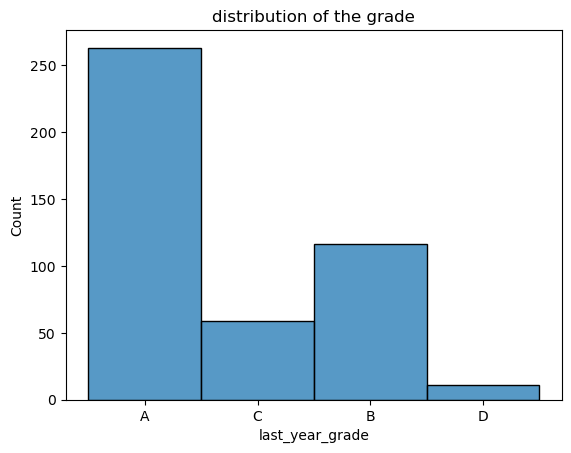

In [73]:
## Histogram for Variables:
sns.histplot(df["last_year_grade"])
plt.title('distribution of the grade')

In [74]:
# for col in df:
#   sns.histplot(df[col])
#   plt.title(f'distribution of the {col}')
#   plt.show()

In [75]:
# for col in df:
#   print(pd.crosstab(df['last_year_grade'], df[col], margins=True, margins_name="Total"))

In [76]:
#Make y have only two clasess , k = 2
data2 = df.replace(['A','B'],'High Grade')

In [77]:
data2 = data2.replace(['C','D'],'Low Grade')

In [78]:
data2['last_year_grade']

0      High Grade
1      High Grade
2       Low Grade
3      High Grade
4      High Grade
          ...    
458    High Grade
459    High Grade
460    High Grade
461    High Grade
462     Low Grade
Name: last_year_grade, Length: 449, dtype: object

**Building model**

*   K = 2






1.   KNN




In [79]:
X = data2.drop(['last_year_grade'], axis=1)  # features
y = data2['last_year_grade']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [80]:

# KNN Mode2
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))


KNN Confusion Matrix:
[[78  4]
 [ 7  1]]
KNN Classification Report:
              precision    recall  f1-score   support

  High Grade       0.92      0.95      0.93        82
   Low Grade       0.20      0.12      0.15         8

    accuracy                           0.88        90
   macro avg       0.56      0.54      0.54        90
weighted avg       0.85      0.88      0.86        90

KNN Recall: 0.538109756097561
KNN F1 Score: 0.54398894518655



2.   NB



In [81]:
# Naive Bayes Model2
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='macro'))

Naive Bayes Confusion Matrix:
[[71 11]
 [ 3  5]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

  High Grade       0.96      0.87      0.91        82
   Low Grade       0.31      0.62      0.42         8

    accuracy                           0.84        90
   macro avg       0.64      0.75      0.66        90
weighted avg       0.90      0.84      0.87        90

Naive Bayes Recall: 0.7454268292682926
Naive Bayes F1 Score: 0.6634615384615384




3.   Decision Tree



In [82]:
# Decision Tree Model2
dt = DecisionTreeClassifier(max_depth=3, random_state=100 ,)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))

Decision Tree Confusion Matrix:
[[79  3]
 [ 7  1]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

  High Grade       0.92      0.96      0.94        82
   Low Grade       0.25      0.12      0.17         8

    accuracy                           0.89        90
   macro avg       0.58      0.54      0.55        90
weighted avg       0.86      0.89      0.87        90

Decision Tree Recall: 0.5442073170731707
Decision Tree F1 Score: 0.5535714285714286


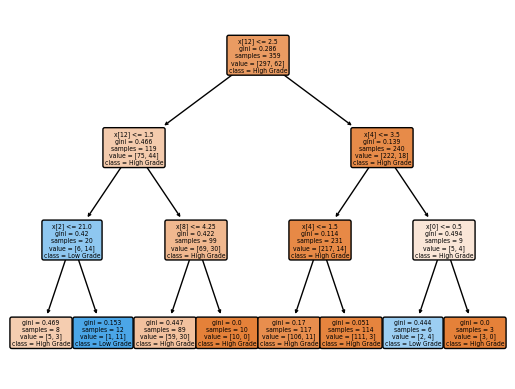

In [83]:
from sklearn.tree import plot_tree

# Create a decision tree visualization
plot_tree(dt, filled=True, rounded=True, class_names=y_train.unique())

# Display the tree
plt.show()

In [53]:
log_mod = LogisticRegression(random_state=1234)
# Fit the logistic regression
log_model_1 = log_mod.fit(X_train, y_train)
# display intercept
print(log_model_1.intercept_)
# display coefficients
print(log_model_1.coef_)

[-5.3072154]
[[ 0.51617657 -0.24624187  0.40211657 -0.56002372  0.11303428 -0.28020489
   0.82791294 -0.59006042 -0.11956186 -0.51025478  0.15273402 -0.07282888
  -0.86772293 -0.0414288  -0.03125373]]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Make predictions on test set
y_pred_logit = log_model_1.predict(X_test)
y_pred_logit

array(['High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'Low Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'Low Grade', 'High Grade', 'Low Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'Low Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'Low Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade', 'High Grade',
       'High Grade', 'High Grade', 'High Grade

In [55]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_logit)
print("Confusion matrix:\n", cm)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logit)
print("Logit accuracy score:", accuracy)


Confusion matrix:
 [[77  5]
 [ 5  3]]
Logit accuracy score: 0.8888888888888888


In [56]:
# Calculate classification report
report = classification_report(y_test, y_pred_logit)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

  High Grade       0.94      0.94      0.94        82
   Low Grade       0.38      0.38      0.38         8

    accuracy                           0.89        90
   macro avg       0.66      0.66      0.66        90
weighted avg       0.89      0.89      0.89        90



In [57]:
for col in data2:
  print(pd.crosstab(data2['last_year_grade'], data2[col], margins=True, margins_name="Total"))

Gender             0    1  Total
last_year_grade                 
High Grade       255  124    379
Low Grade         43   27     70
Total            298  151    449
Grade             0    1   2   3   4   5  Total
last_year_grade                                
High Grade       74  116  81  63  30  15    379
Low Grade         8   20  15  19   5   3     70
Total            82  136  96  82  35  18    449
Age               19  20  21  22  23  Total
last_year_grade                            
High Grade       120  77  76  58  48    379
Low Grade         13  15   9  16  17     70
Total            133  92  85  74  65    449
Do you study in the same city you stay in?     0    1  Total
last_year_grade                                             
High Grade                                   116  263    379
Low Grade                                     29   41     70
Total                                        145  304    449
University       0    1    2  3  4  5  6  7  8  9  10  11  Total
last_

Text(0.5, 1.0, 'distribution of the University')

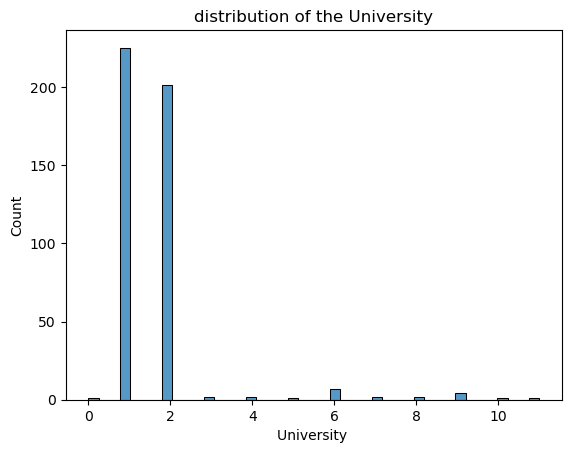

In [58]:
## Histogram for Variables:
sns.histplot(data2["University "])
plt.title('distribution of the University')
# فيهم اعلى عدد ولذلك فيهم اعلى عدد في high&low gardes

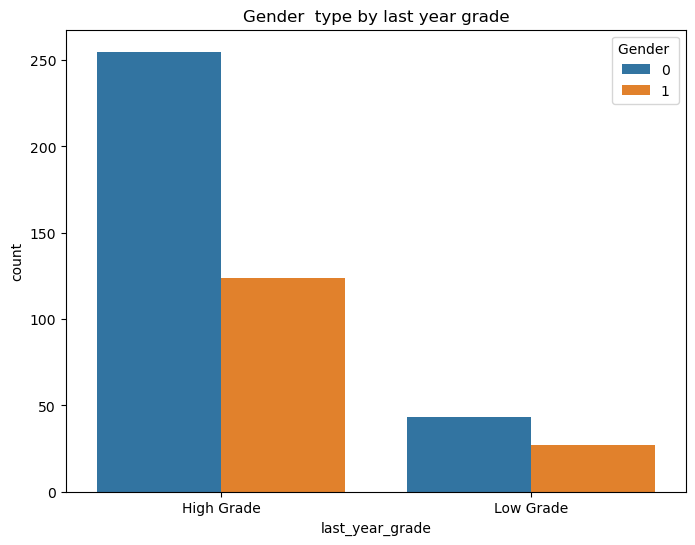

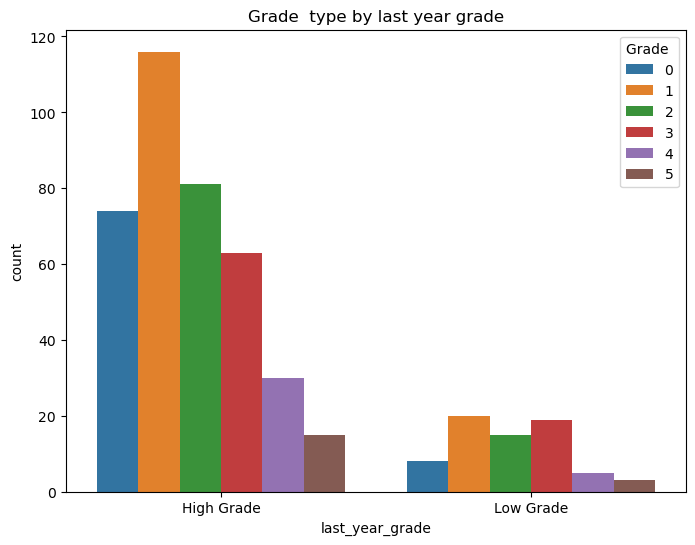

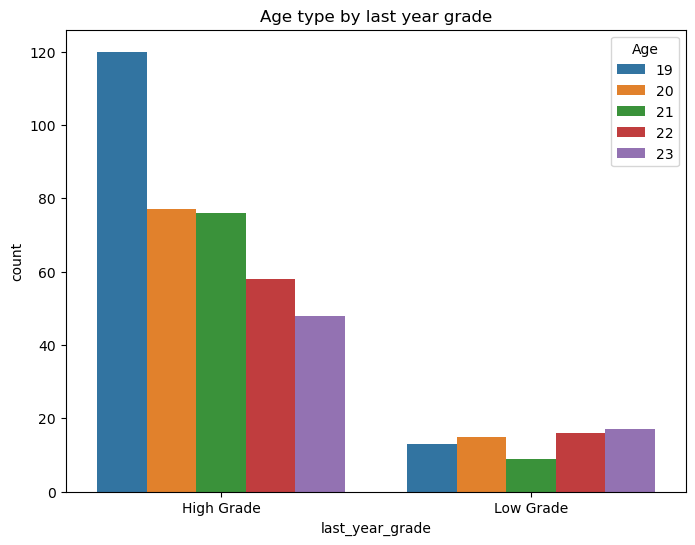

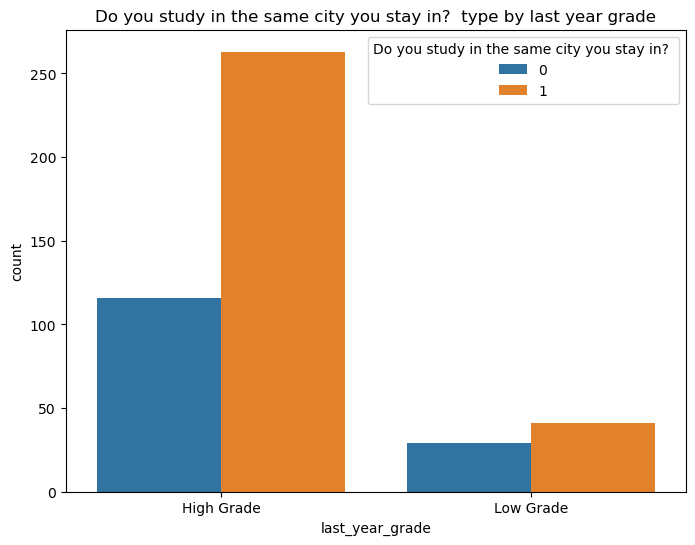

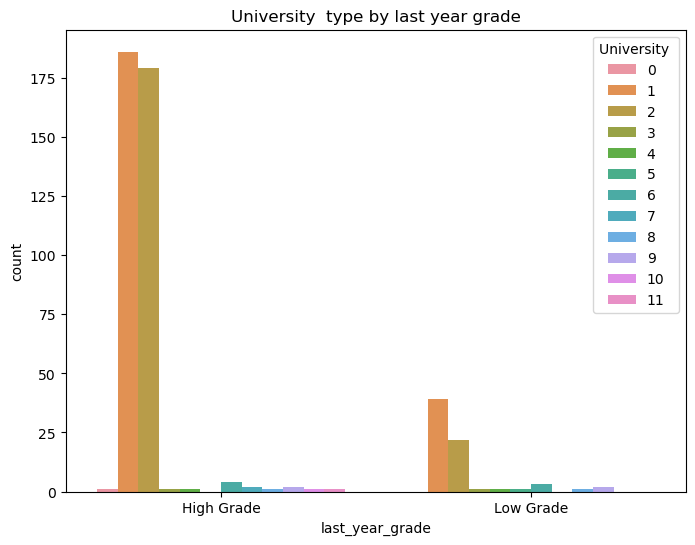

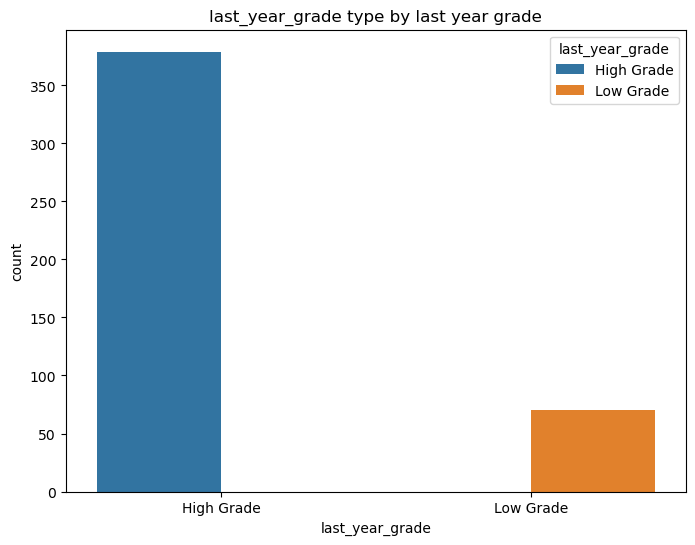

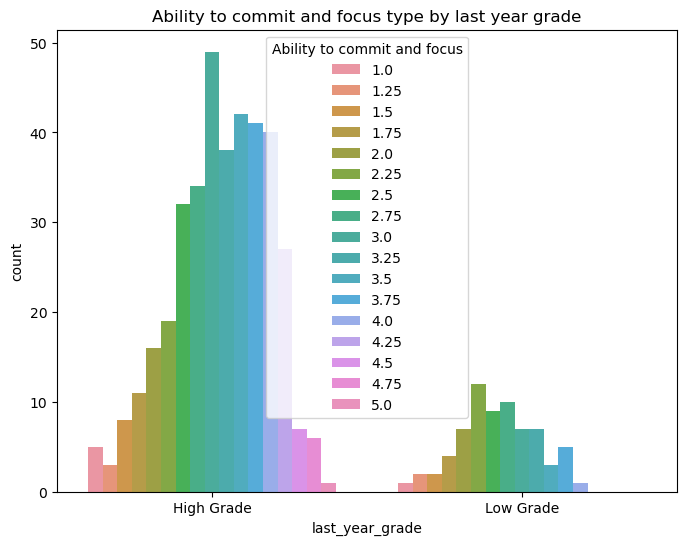

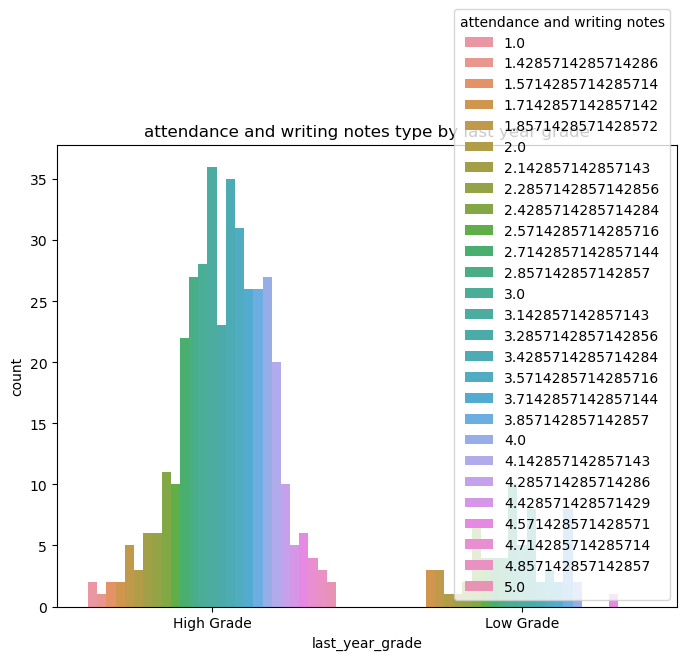

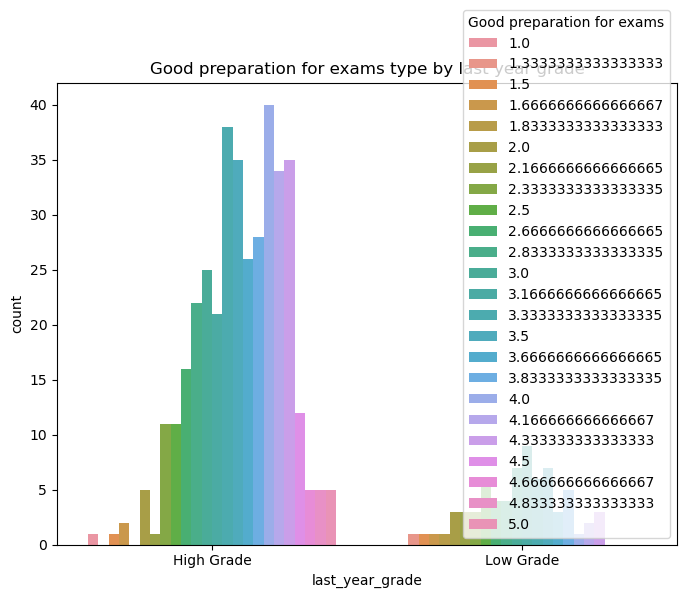

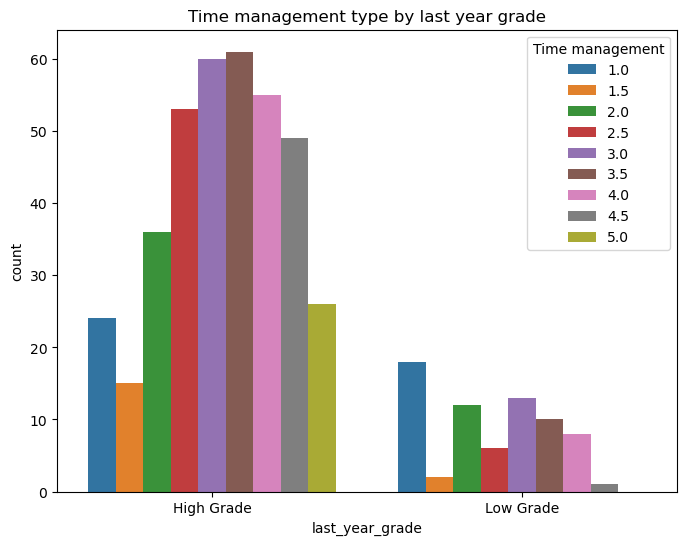

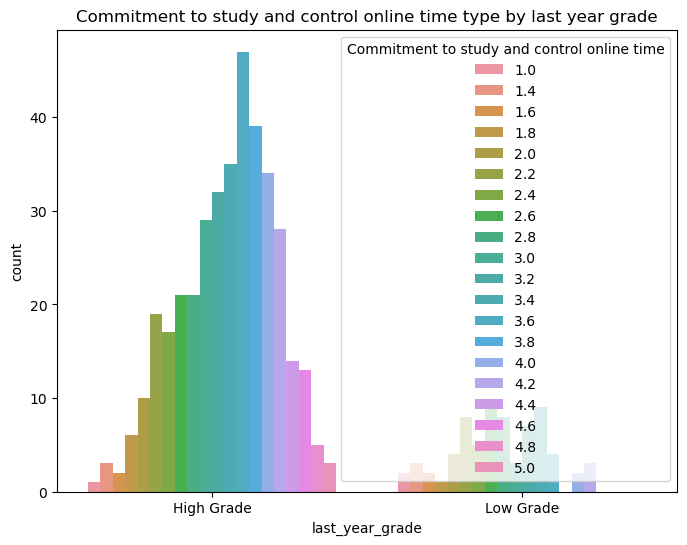

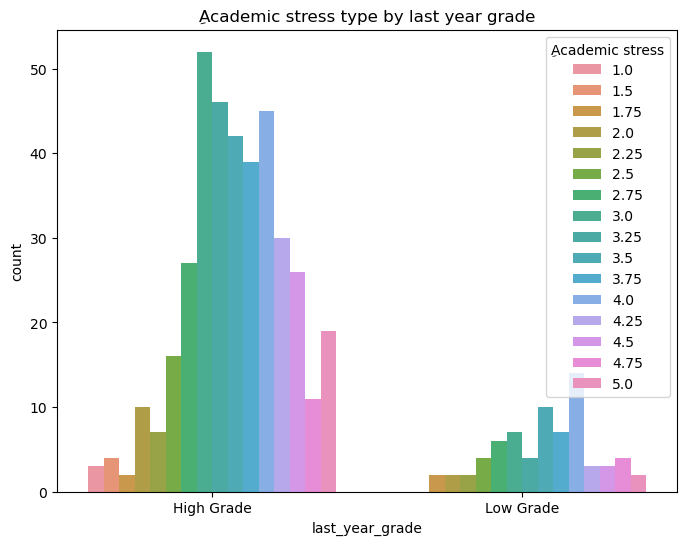

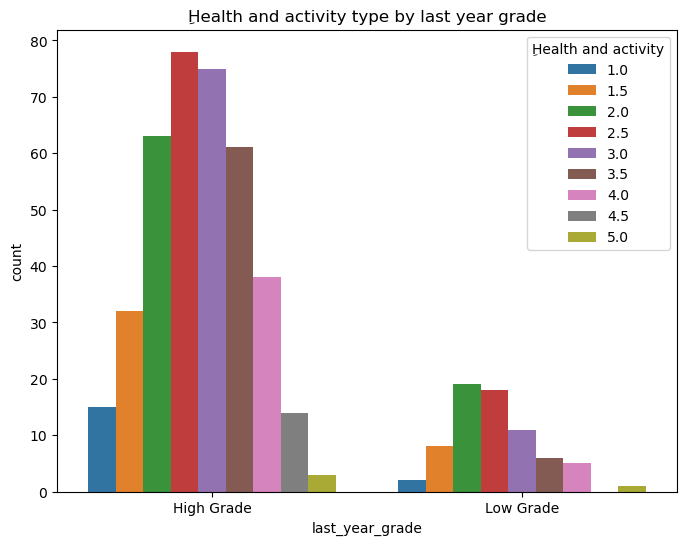

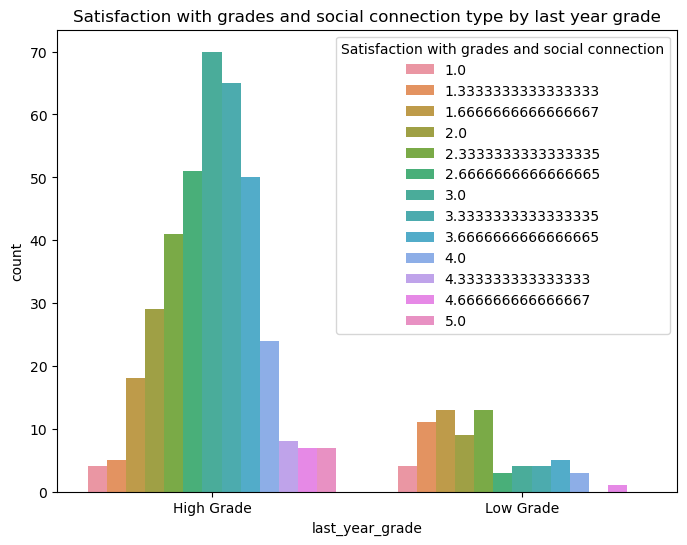

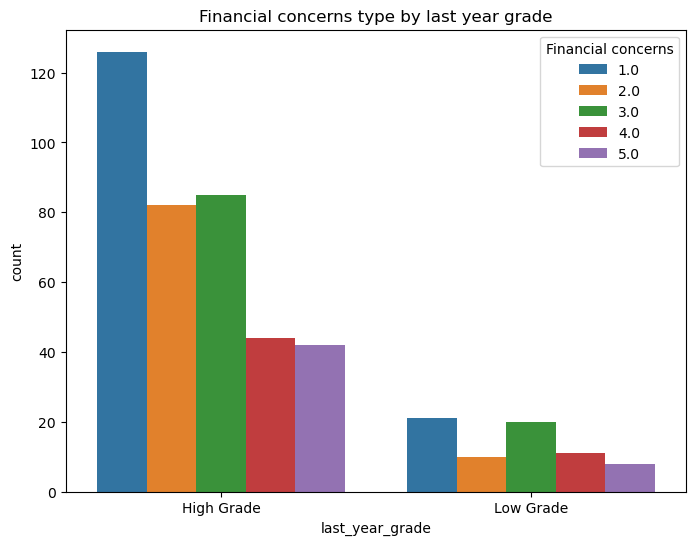

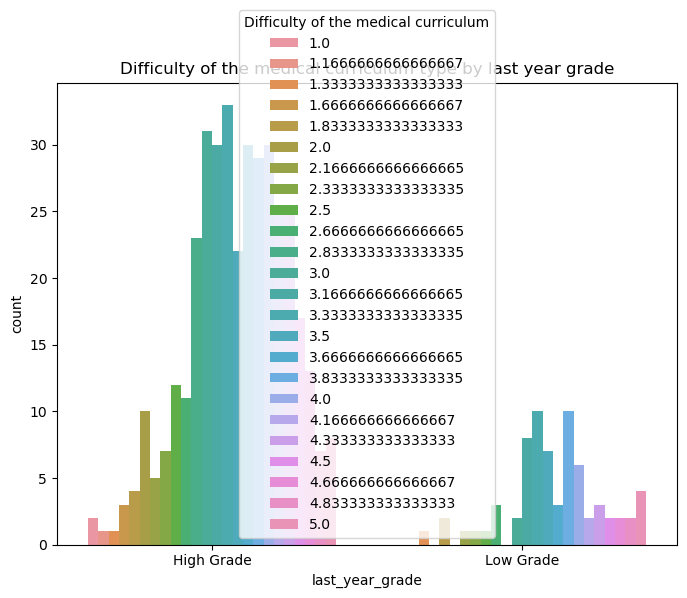

In [59]:
# Countplot for two categorical variables (Department and Gender)
for col in df:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=data2['last_year_grade'], hue=data2[col])
  plt.title(f'{col} type by last year grade')
  plt.show()

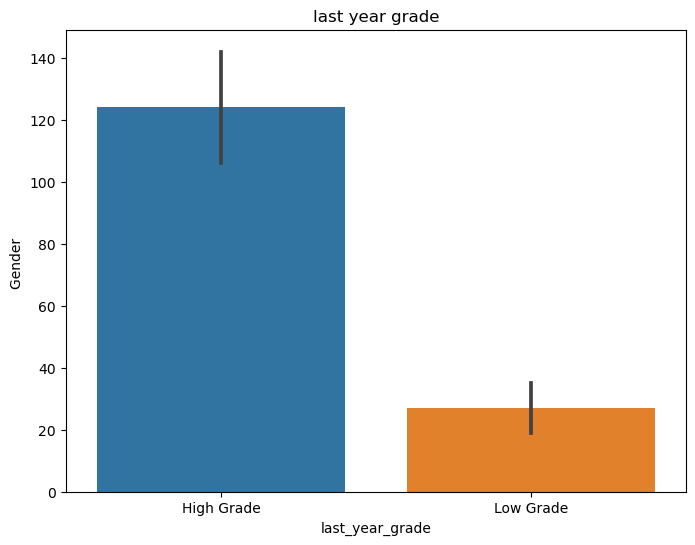

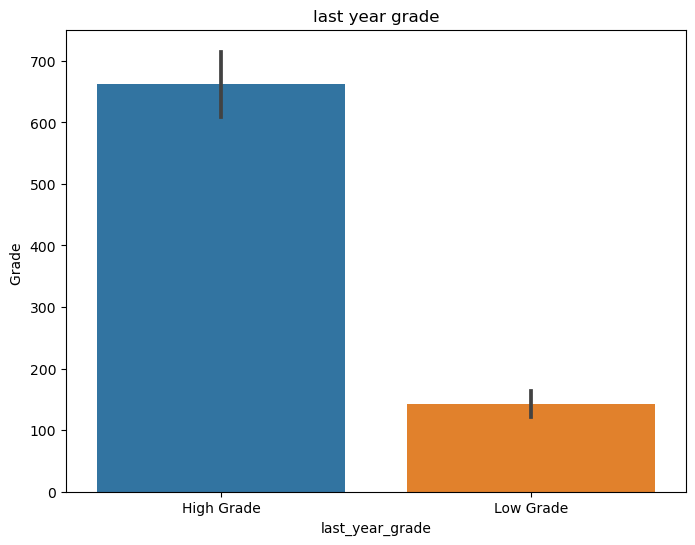

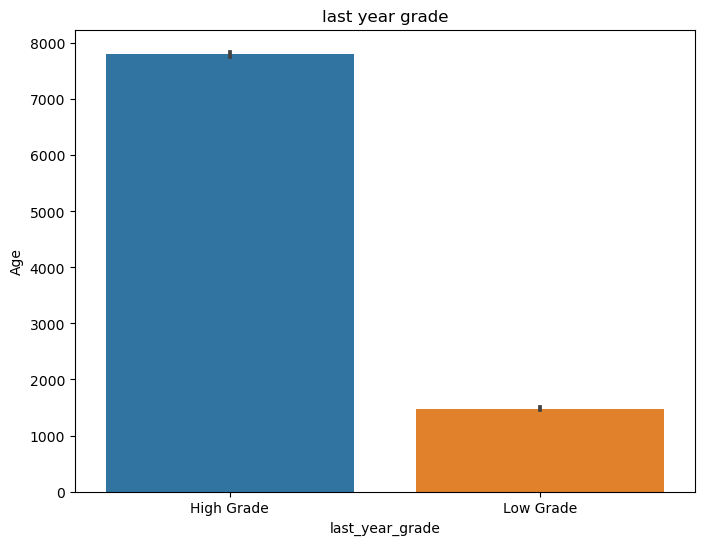

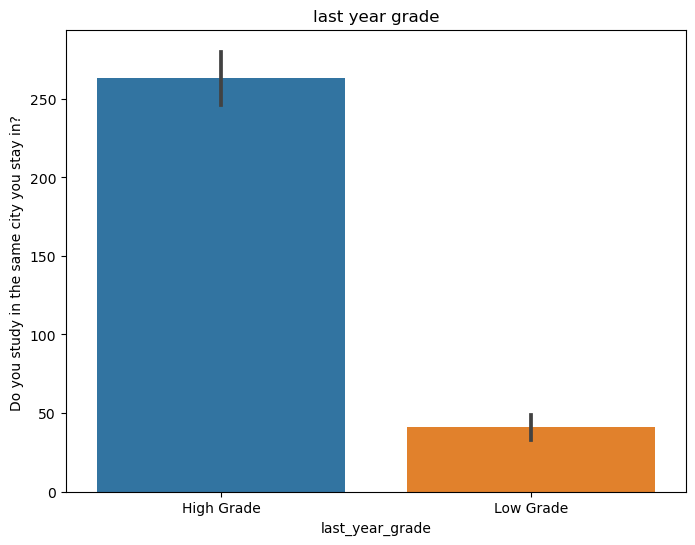

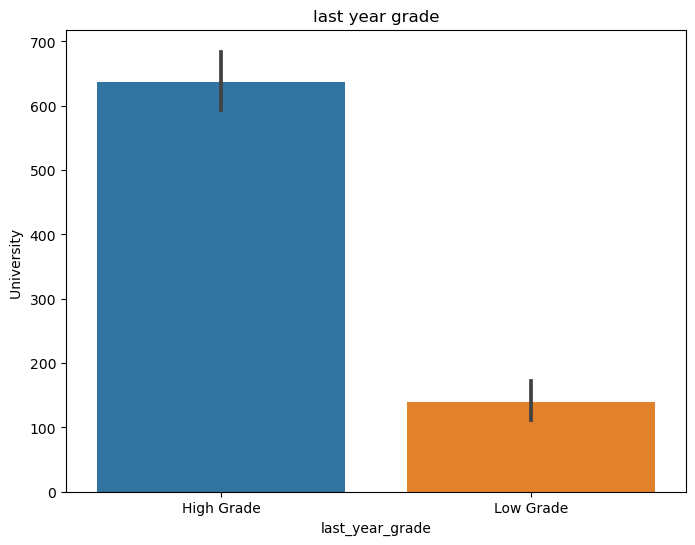

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x600 with 0 Axes>

In [60]:
#Analyzing the realation between diff vars and grades
for col in data2:
  plt.figure(figsize=(8, 6))
  sns.barplot(x= 'last_year_grade', y=col,data = data2, estimator=sum)
  plt.title('last year grade')
  plt.ylabel(col)
  plt.show()

In [ ]:
# #Analyzing the distribution
# for col in data2:
#   plt.figure(figsize=(8,6))
#   sns.histplot(data2['Rating'], bins=10, kde=True)
#   plt.title(f'Distribution of {col}')
#   plt.xlabel('last_year_grade')
#   plt.ylabel(col)
#   plt.show()

In [ ]:
df.shape

**Reduced** **Model**
K=4

In [ ]:
df1 = df[["Ability to commit and focus", "Good preparation for exams", "Time management",   "ِHealth and activity", "ِSatisfaction with grades and social connection",'last_year_grade']]

In [ ]:
X = df1.drop(['last_year_grade'], axis=1)  # features
y = df1['last_year_grade']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))

In [ ]:
# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='macro'))

In [ ]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=3, random_state=100 ,)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))

In [ ]:
log_mod = LogisticRegression(random_state=1234)
# Fit the logistic regression
log_model_1 = log_mod.fit(X_train, y_train)
# display intercept
print(log_model_1.intercept_)
# display coefficients
print(log_model_1.coef_)

In [ ]:
# Make predictions on test set
y_pred_logit = log_model_1.predict(X_test)
y_pred_logit

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_logit)
print("Confusion matrix:\n", cm)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_logit)
print("Logit accuracy score:", accuracy)


In [ ]:
# Calculate classification report
report = classification_report(y_test, y_pred_logit)
print("Classification report:\n", report)
